In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [2]:
df = pd.read_csv('heart_disease.csv.txt')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
model = sm.GLM.from_formula("AHD ~ Age", family = sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     ['AHD[No]', 'AHD[Yes]']   No. Observations:                  303
Model:                                 GLM   Df Residuals:                      301
Model Family:                     Binomial   Df Model:                            1
Link Function:                       logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -201.27
Date:                     Wed, 29 Sep 2021   Deviance:                       402.54
Time:                             09:09:20   Pearson chi2:                     303.
No. Iterations:                          4                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0059      0.759      3.960      0.000       1.518       4.494
Age           -0.0520      0.014     -3.803      0.000      -0.079      -0.025
==============================================================================
"""

In [4]:
df["Sex1"] = df.Sex.replace({1: "Male", 0:"Female"})
c = pd.crosstab(df.Sex1, df.AHD)
c = c.apply(lambda x: x/x.sum(), axis=1)
c
# c["odds"] = c.loc[:,0] / c.loc[:, 0]

AHD,No,Yes
Sex1,,
Female,0.742268,0.257732
Male,0.446602,0.553398


In [5]:
model = sm.GLM.from_formula("AHD ~ Sex1", family = sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     ['AHD[No]', 'AHD[Yes]']   No. Observations:                  303
Model:                                 GLM   Df Residuals:                      301
Model Family:                     Binomial   Df Model:                            1
Link Function:                       logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -196.97
Date:                     Wed, 29 Sep 2021   Deviance:                       393.93
Time:                             09:09:21   Pearson chi2:                     303.
No. Iterations:                          4                                         
Covariance Type:                 nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0578      0.232      4.557      0.000       0.603       1.513
Sex1[T.Male]    -1.2722      0.271     -4.692      0.000      -1.804      -0.741
================================================================================
"""

In [6]:
df["Sex1"] = df.Sex.replace({1: "Male", 0:"Female"})
c = pd.crosstab(df.Sex1, df.AHD)
c = c.apply(lambda x: x/x.sum(), axis=1)
c

AHD,No,Yes
Sex1,,
Female,0.742268,0.257732
Male,0.446602,0.553398


In [7]:
model = sm.GLM.from_formula("AHD ~ Age + Sex1", family = sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     ['AHD[No]', 'AHD[Yes]']   No. Observations:                  303
Model:                                 GLM   Df Residuals:                      300
Model Family:                     Binomial   Df Model:                            2
Link Function:                       logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -186.15
Date:                     Wed, 29 Sep 2021   Deviance:                       372.31
Time:                             09:09:21   Pearson chi2:                     298.
No. Iterations:                          4                                         
Covariance Type:                 nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.8077      0.898      5.353      0.000       3.047       6.568
Sex1[T.Male]    -1.4989      0.289     -5.179      0.000      -2.066      -0.932
Age             -0.0657      0.015     -4.427      0.000      -0.095      -0.037
================================================================================
"""

In [8]:
model = sm.GLM.from_formula("AHD ~ Age + Sex1 + Chol", family = sm.families.Binomial(), data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     ['AHD[No]', 'AHD[Yes]']   No. Observations:                  303
Model:                                 GLM   Df Residuals:                      299
Model Family:                     Binomial   Df Model:                            3
Link Function:                       logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -184.30
Date:                     Wed, 29 Sep 2021   Deviance:                       368.59
Time:                             09:09:21   Pearson chi2:                     295.
No. Iterations:                          4                                         
Covariance Type:                 nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.9094      1.095      5.395      0.000       3.762       8.056
Sex1[T.Male]    -1.6318      0.303     -5.382      0.000      -2.226      -1.038
Age             -0.0622      0.015     -4.117      0.000      -0.092      -0.033
Chol            -0.0048      0.003     -1.902      0.057      -0.010       0.000
================================================================================
"""

In [9]:
df[['Age', 'Sex', 'Chol']].corr()

,Age,Sex,Chol
Age,1.000000,-0.097542,0.208950
Sex,-0.097542,1.000000,-0.199915
Chol,0.208950,-0.199915,1.000000


In [10]:
from statsmodels.sandbox.predict_functional import predict_functional
values= {"Sex1": "Female", "Sex":0, "AHD": 1, "Chol": 250}
# type(values)

# pr, cb, fv = predict_functional(result,focus_var='Age', values=values, ci_method="simultaneous")

# ax = sns.lineplot(fv, pr, lw=4)
# ax.fill_between(fv, cb[:,0], cb[:, 1], color='grey', alpha=0.4)
# ax.set_xlabel("Age")
# ax.set_ylabel("Heart Disease")


In [11]:
# pr1 = 1 / (1 + np.exp(-pr))
# cb1 = 1 / (1 + np.exp(-cb))
# ax = sns.lineplot(fv, pr1, lw=4)
# ax.fill_between(fv, cb1[:, 0], cb[:, 1], color='grey', alpha=0.4)
# ax.set_xlabel("Age", size=15)
# ax.set_ylabel("Heart Disease")



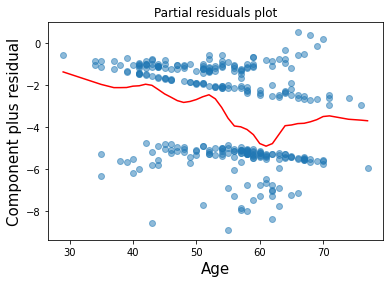

In [12]:
from statsmodels.graphics.regressionplots import add_lowess
fig = result.plot_partial_residuals("Age")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.5)
_ = add_lowess(ax)


In [13]:
df['ChestPain'] = df.ChestPain.replace({"typical":1, "asymptomatic": 2, 'nonanginal': 3, 'nontypical':4})
df['Thal'] = df.Thal.replace({'fixed': 1, 'normal': 2, 'reversable': 3})
df[['Age', 'Sex1', 'Chol','RestBP', 'Fbs', 'RestECG', 'Slope', 'Oldpeak', 'Ca', 'ExAng', 'ChestPain', 'Thal']].corr()


,Age,Chol,RestBP,Fbs,RestECG,Slope,Oldpeak,Ca,ExAng,ChestPain,Thal
Age,1.000000,0.208950,0.284946,0.118530,0.148868,0.161770,0.203805,0.362605,0.091661,-0.173124,0.061823
Chol,0.208950,1.000000,0.130120,0.009841,0.171043,-0.004062,0.046564,0.119000,0.061310,-0.015387,0.080874
RestBP,0.284946,0.130120,1.000000,0.175340,0.146560,0.117382,0.189171,0.098773,0.064762,-0.145149,0.057602
Fbs,0.118530,0.009841,0.175340,1.000000,0.069564,0.059894,0.005747,0.145478,0.025665,-0.023976,-0.007605
RestECG,0.148868,0.171043,0.146560,0.069564,1.000000,0.133946,0.114133,0.128343,0.084867,-0.157005,-0.011543
Slope,0.161770,-0.004062,0.117382,0.059894,0.133946,1.000000,0.577537,0.110119,0.257748,-0.250500,0.106051
Oldpeak,0.203805,0.046564,0.189171,0.005747,0.114133,0.577537,1.000000,0.295832,0.288223,-0.334661,0.208998
Ca,0.362605,0.119000,0.098773,0.145478,0.128343,0.110119,0.295832,1.000000,0.145570,-0.187667,0.149768
ExAng,0.091661,0.061310,0.064762,0.025665,0.084867,0.257748,0.288223,0.145570,1.000000,-0.314993,0.228084
ChestPain,-0.173124,-0.015387,-0.145149,-0.023976,-0.157005,-0.250500,-0.334661,-0.187667,-0.314993,1.000000,-0.168103


In [14]:
model = sm.GLM.from_formula("AHD ~ Age + Sex1 + Chol + RestBP+ Fbs + RestECG + Slope + Oldpeak + Ca + ExAng + ChestPain + Thal", family = sm.families.Binomial(), data=df)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     ['AHD[No]', 'AHD[Yes]']   No. Observations:                  297
Model:                                 GLM   Df Residuals:                      284
Model Family:                     Binomial   Df Model:                           12
Link Function:                       logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -113.49
Date:                     Wed, 29 Sep 2021   Deviance:                       226.99
Time:                             09:09:23   Pearson chi2:                     287.
No. Iterations:                          6                                         
Covariance Type:                 nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.0184      2.167      4.162      0.000       4.771      13.266
Sex1[T.Male]    -1.3765      0.426     -3.230      0.001      -2.212      -0.541
Age             -0.0052      0.021     -0.245      0.807      -0.047       0.037
Chol            -0.0041      0.004     -1.160      0.246      -0.011       0.003
RestBP          -0.0165      0.010     -1.621      0.105      -0.036       0.003
Fbs              1.0297      0.507      2.031      0.042       0.036       2.024
RestECG         -0.2011      0.173     -1.164      0.244      -0.540       0.138
Slope           -0.7875      0.336     -2.343      0.019      -1.446      -0.129
Oldpeak         -0.2789      0.205     -1.361      0.174      -0.681       0.123
Ca              -1.3120      0.247     -5.301      0.000      -1.797      -0.827
ExAng           -1.4776      0.372     -3.976      0.000      -2.206      -0.749
ChestPain        0.2524      0.205      1.234      0.217      -0.149       0.653
Thal            -0.9276      0.282     -3.285      0.001      -1.481      -0.374
================================================================================
"""

In [15]:
X = df[['Age', 'Sex1', 'Chol','RestBP', 'Fbs', 'RestECG', 'Slope', 'Oldpeak', 'Ca', 'ExAng', 'ChestPain', 'Thal']]
predicted_output = result.predict(X)
predicted_output.fillna(0)
print(predicted_output)

1      0.714797
2      0.003425
3      0.008986
4      0.462060
5      0.967750
         ...   
299    0.519043
300    0.093486
301    0.090071
302    0.814391
303         NaN
Length: 303, dtype: float64


In [16]:
for i in range(1, len(predicted_output)):
    predicted_output = predicted_output.replace()
# print((predicted_output))
    if predicted_output[i] >= 0.5:
        predicted_output = predicted_output.replace(predicted_output[i], 1)
    else:
        predicted_output = predicted_output.replace(predicted_output[i], 0)
# print(len(predicted_output))

In [18]:
accuracy = 0
for i in range(1, len(predicted_output)):
    if df['AHD'][i] == 'No':
        df['AHD'][i] = 0.0
    else:
        df['AHD'][i] = 1.0
        
        if df['AHD'][i] == predicted_output[i]:
            accuracy += 1
#     print(df['AHD'][i], predicted_output[i])
accuracy/len(df)


C:\Users\Atharva\AppData\Local\Temp/ipykernel_460/3595470194.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AHD'][i] = 1.0


0.5544554455445545